<center><h1>Random Forest and Gradient Boosting</h1></center>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score,roc_curve,auc, recall_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load data

In [0]:
data_card = pd.read_csv('/content/drive/My Drive/Projet_Apprentissage_Supervisé_1819/creditcard.csv')

In [4]:
data_card.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Check if there are null values

In [5]:
data_card.isnull().values.any()

False

### Plot Classes frequencies 

In [0]:
compter = data_card["Class"].value_counts()

In [0]:
name_labels = ['Not Fraud','Fraud']
def plot_bar_x():
    index = np.arange(len(name_labels))
    colours = ['#1F77B4','#FF7F0E']
    plt.figure(figsize=(8,5))
    label = [compter.values[0],compter.values[1]]
    for i in range(len(index)):
        plt.bar(index[i], compter.values[i],align='center', alpha=0.5,color = colours[i])
        plt.text(x = index[i]-0.1 , y = compter.values[i]+5000, s = label[i], size = 12)
    plt.legend(name_labels)
    plt.xlabel('Class', fontsize=2, size = 20)
    plt.ylabel('Number of transactions', fontsize=5,size = 20)
    plt.xticks(index, name_labels, fontsize=5,size = 16, color = 'gray')
    plt.title('Credit Card Fraud Class - data unbalance', size = 22)
    plt.grid(linewidth = 0.2)
    
    plt.show()

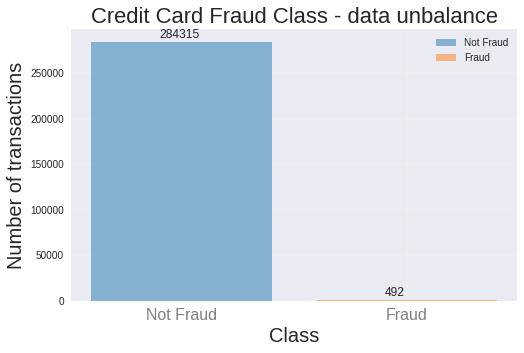

In [8]:
plot_bar_x()

### Plot Correclation matrix

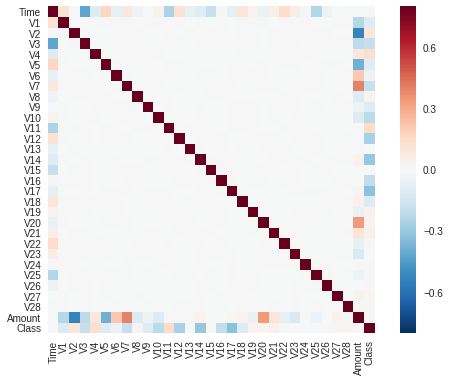

In [9]:
correlation_matrix = data_card.corr()
fig = plt.figure(figsize=(9,6))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

### Describe Amount variable of first and second classes

In [0]:
no_trans = data_card[data_card['Class'] == 0]
fraud_trans = data_card[data_card['Class'] == 1]

#### Class = 0

In [11]:
no_trans['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

#### Class = 1

In [12]:
fraud_trans['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### Plot Time and Amount Features

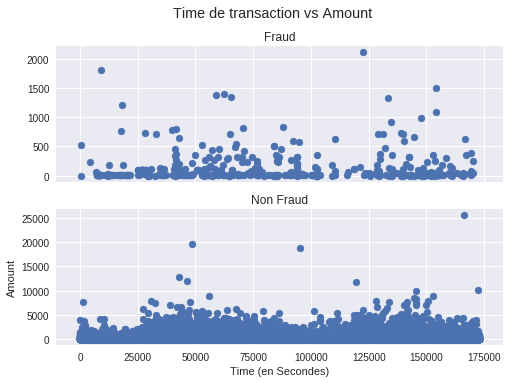

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time de transaction vs Amount')

ax1.scatter(fraud_trans['Time'], fraud_trans['Amount'])
ax1.set_title('Fraud')

ax2.scatter(no_trans['Time'], no_trans['Amount'])
ax2.set_title('Non Fraud')

plt.xlabel('Time (en Secondes)')
plt.ylabel('Amount')
plt.show()

We can remove Time Feature 

### Drop Time feature.
### Standarscale Amount feature

In [0]:
data_card = data_card.drop(['Time'], axis=1)

data_card['Amount'] = StandardScaler().fit_transform(data_card['Amount'].values.reshape(-1, 1))

### Split Data to train and test

In [ ]:
train_df, test_df = train_test_split(data_card, test_size=0.33, random_state=42, shuffle=True)

In [ ]:
predictors = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

## Random forest classifier on orginial data

In [0]:
rdf = RandomForestClassifier(n_jobs = 4,n_estimators = 100, random_state = 42)

In [18]:
rdf.fit(train_df[predictors],train_df['Class'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Prdictions

In [0]:
preds = rdf.predict(test_df[predictors])

### Compute roc-auc and recall scores

In [ ]:
print('roc-auc score is:',roc_auc_score(test_df['Class'].values, preds))
print('recall score is:',recall_score(test_df['Class'].values, preds))

### Plot Confusion matrix

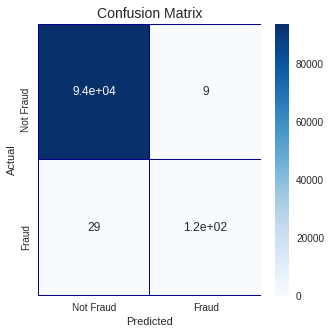

In [20]:
cm = pd.crosstab(test_df['Class'].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

### Plot roc-auc Curve

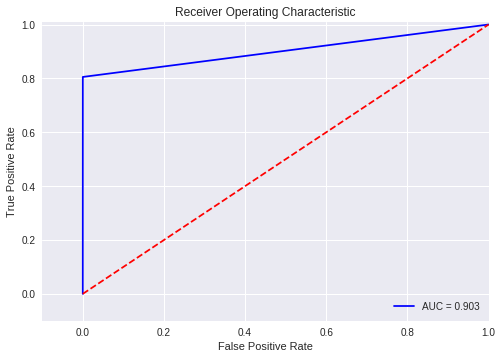

In [22]:
fpr, tpr, thresholds = roc_curve(test_df['Class'].values, preds)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest classifier with different hypeparameters on original data.

In [0]:
rdf1 = RandomForestClassifier(n_jobs = 4,n_estimators = 200, random_state = 42)

In [24]:
rdf1.fit(train_df[predictors],train_df['Class'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=4,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Predictions

In [ ]:
preds1 = rdf1.predict(test_df[predictors])

###  Compute roc-auc and recall scores

In [ ]:
print('roc-auc score is:',roc_auc_score(test_df['Class'].values, preds1))
print('recall score is:',recall_score(test_df['Class'].values, preds1))

#### Confusion matrix

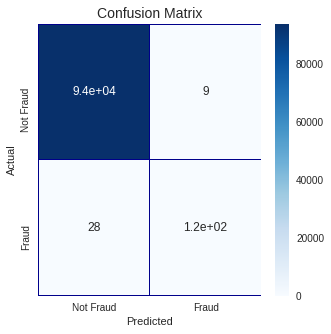

In [26]:
cm = pd.crosstab(test_df['Class'].values, preds1, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

### Plot roc-auc Curve

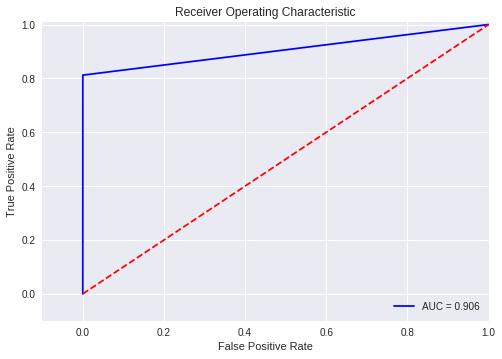

In [28]:
fpr, tpr, thresholds = roc_curve(test_df['Class'].values, preds1)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Oversample train data

In [0]:
os = SMOTE(random_state=42)

In [0]:
os_data_train,os_label_train = os.fit_sample(train_df[predictors],train_df['Class'])

In [31]:
os_data_X = pd.DataFrame(data=os_data_train,columns=predictors)
os_data_y= pd.DataFrame(data=os_label_train,columns=['Class'])
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['Class']==0]))
print("Number of subscription",len(os_data_y[os_data_y['Class']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Class']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Class']==1])/len(os_data_X))

length of oversampled data is  380954
Number of no subscription in oversampled data 190477
Number of subscription 190477
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


## Random forest on oversampled data
- Number of trees in forest = 200

In [32]:
rdf2 = RandomForestClassifier(n_jobs = 4,n_estimators = 200, random_state = 42)
rdf2.fit(os_data_X,os_data_y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=4,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Predictions

In [0]:
preds2 = rdf2.predict(test_df[predictors])

### Roc-auc and recall scores

In [34]:
print('roc-auc score is:',roc_auc_score(test_df['Class'].values, preds2))
print('recall score is:',recall_score(test_df['Class'].values, preds2))

roc-auc score is: 0.9361243874385258
recall score is: 0.87248322147651


### Plot roc-auc Curve

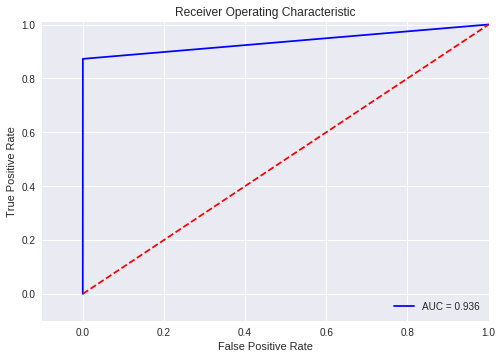

In [35]:
fpr, tpr, thresholds = roc_curve(test_df['Class'].values, preds2)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Plot Confusion matrix

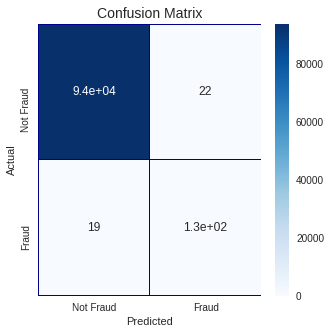

In [36]:
cm = pd.crosstab(test_df['Class'].values, preds2, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# **GradientBoosting**

In [0]:
gb = GradientBoostingClassifier(n_estimators = 200, random_state = 42)

## Gradient Boosting on original data

In [38]:
gb.fit(train_df[predictors],train_df['Class'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### Predictions 

In [ ]:
predsgb = gb.predict(test_df[predictors])

### Compute roc-auc and recall scores

In [39]:
print('roc-auc score is:',roc_auc_score(test_df['Class'].values, predsgb))
print('recall score is:',recall_score(test_df['Class'].values, predsgb))

roc-auc score is: 0.630675334944659
recall score is: 0.26174496644295303


### Plot roc-auc curve

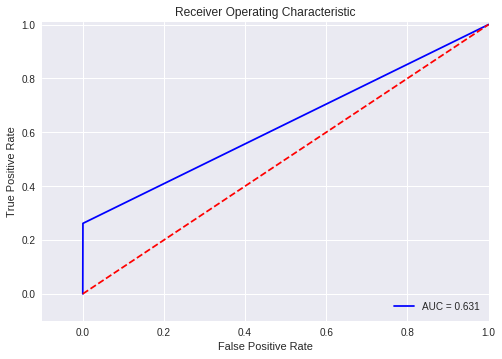

In [40]:
fpr, tpr, thresholds = roc_curve(test_df['Class'].values, predsgb)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Plot Confusion matrix

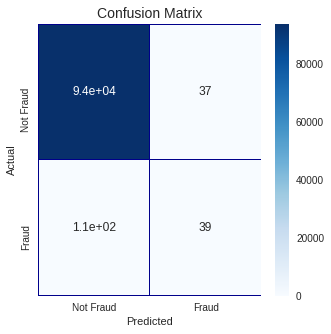

In [41]:
cm = pd.crosstab(test_df['Class'].values, predsgb, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

## Gradient boosting on oversampled data

In [0]:
gb1 = GradientBoostingClassifier(n_estimators = 200, random_state = 42)

In [43]:
gb1.fit(os_data_X,os_data_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### Predictions 

In [ ]:
predsgb1 = gb1.predict(test_df[predictors])

### Compute roc-auc and recall scores

In [44]:
print('roc-auc score is:',roc_auc_score(test_df['Class'].values, predsgb1))
print('recall score is:',recall_score(test_df['Class'].values, predsgb1))

roc-auc score is: 0.9527206033073421
recall score is: 0.912751677852349


### Plot roc-auc curve 

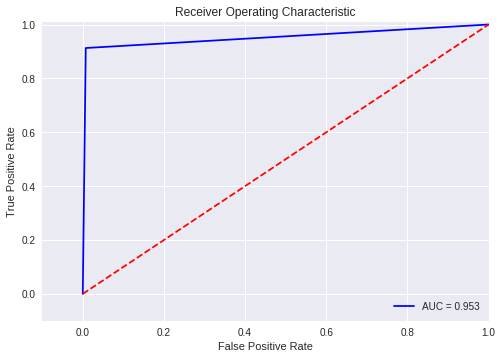

In [45]:
fpr, tpr, thresholds = roc_curve(test_df['Class'].values, predsgb1)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Plot Confusion matrix

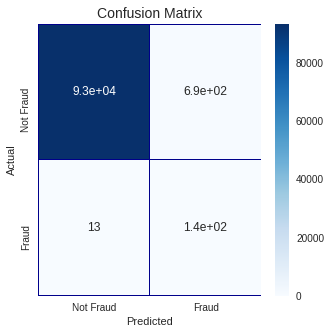

In [46]:
cm = pd.crosstab(test_df['Class'].values, predsgb1, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()